In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from pandas_profiling import ProfileReport
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from os.path import join
import phik
import sqlite3
import os
from numpy import mean
from numpy import std

from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from math import ceil
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings('ignore')
sns.set()

import xgboost as xgb

# Importing H2 dataset

In [2]:
df= pd.read_csv(r'H2.csv')
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Initial Dataset Analysis

In [3]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [5]:
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [6]:
df[df['Children'].isnull()]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
540,1,2,2015,August,32,3,1,0,2,NaN,...,No Deposit,NULL,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
607,1,1,2015,August,32,5,0,2,2,NaN,...,No Deposit,14,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
619,1,1,2015,August,32,5,0,2,3,NaN,...,No Deposit,NULL,NULL,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
1100,1,8,2015,August,33,13,2,5,2,NaN,...,No Deposit,9,NULL,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [7]:
df[df['Country'].isnull()]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
4831,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4832,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4833,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4834,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4835,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4836,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4837,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4838,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4839,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4841,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16


## 2. Feature Engineering

In [8]:
df['LenghtOfStay']= (df['StaysInWeekendNights'] + df['StaysInWeekNights'])

In [9]:
# Transforming Dates into Strings and Creating Features
df['ArrivalDateYear'] = df['ArrivalDateYear'].astype(str)
df['ArrivalDateMonth'] = df['ArrivalDateMonth'].astype(str)
df['ArrivalDateDayOfMonth'] = df['ArrivalDateDayOfMonth'].astype(str)
df['ArrivalDate'] = df[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']].agg('-'.join, axis=1)
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])



In [10]:
#Removing Spaces from start and end
df['Company'] = df['Company'].str.lstrip()
df['Agent'] = df['Agent'].str.lstrip()
df['AssignedRoomType'] = df['AssignedRoomType'].str.lstrip()
df['ReservedRoomType'] = df['ReservedRoomType'].str.lstrip()

## 3. Data Cleaning

### 3.1 Missing Values

In [11]:
#Imputing Zero value to Missing values of Children Variable
df[['Children']] = df[['Children']].fillna(value=0)

In [12]:
# Dropping the 24 rows with missing values of Country variable
df.dropna(inplace = True)

### 3.2 Outliers

In [13]:
#metric and non metric features
metric_features = ['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests','LenghtOfStay']
non_metric_features = df.drop(metric_features,axis=1).columns.tolist()

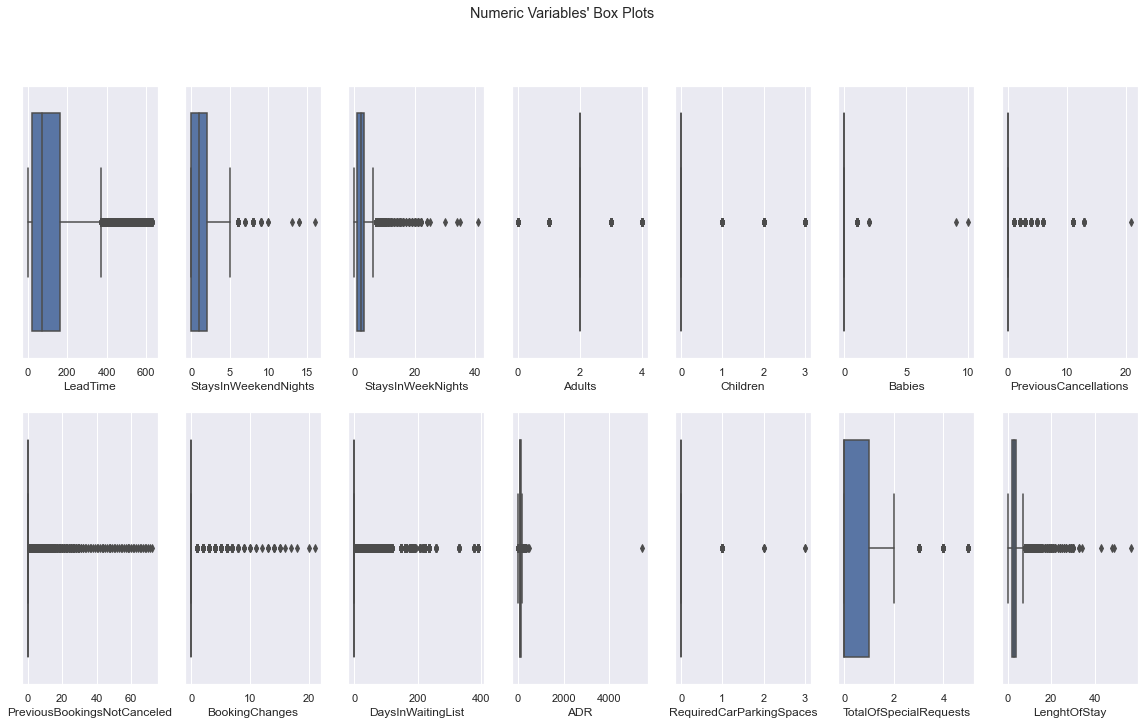

In [14]:
# All Numeric Variables' Box Plots in one figure

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [15]:
# Removal of outliers post-analysis
filters = (
    (df['LeadTime']<=500)
    &
    (df['LenghtOfStay']<=10)
    &

    (df['BookingChanges']<=3)
    &
    (df['Babies']< 8)
    &
    (df['DaysInWaitingList']< 140)
    &
    (df['PreviousBookingsNotCanceled']< 7)
    
    
)


df_filters = df[filters].copy()
print('Percentage of data kept after removing outliers:', np.round(df_filters.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9733


In [16]:
df = df_filters.copy()
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,LenghtOfStay,ArrivalDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03,2,2015-07-01
1,1,88,2015,July,27,1,0,4,2,0.0,...,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01,4,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30,4,2015-07-01
3,1,92,2015,July,27,1,2,4,2,0.0,...,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23,6,2015-07-01
4,1,100,2015,July,27,2,0,2,2,0.0,...,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02,2,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2017-08-30
79326,0,102,2017,August,35,31,2,5,3,0.0,...,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,2017-08-31
79327,0,34,2017,August,35,31,2,5,2,0.0,...,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2017-08-31
79328,0,109,2017,August,35,31,2,5,2,0.0,...,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2017-08-31


## 4. Feature Selection


## 4.1 Data Normalization

In [17]:
#using standard scaler
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df[metric_features])
df[metric_features] = scaled_feat

## 4.2 PHIK Matrix

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'ArrivalDateWeekNumber', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'LenghtOfStay']


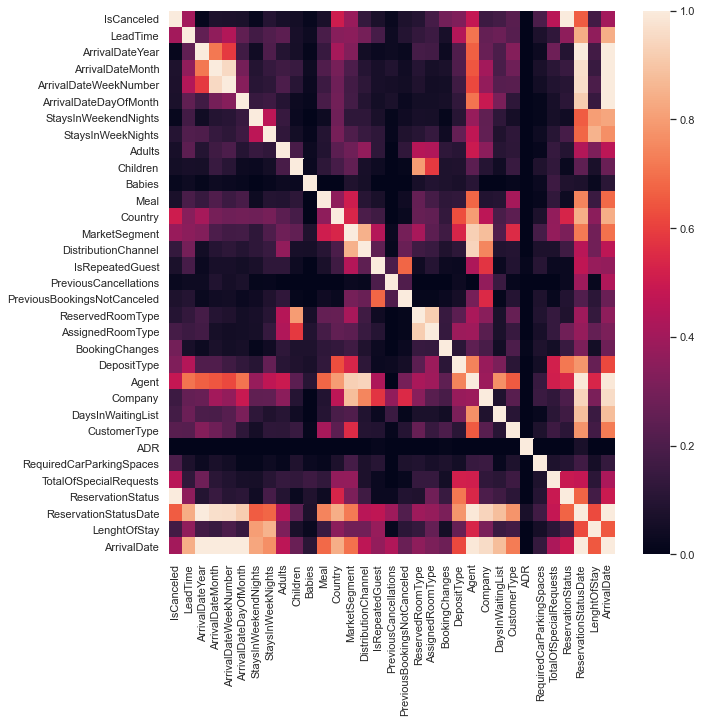

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) # Sample figsize in inches sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(df.phik_matrix())

## 4.3 Features for Encoding

In [19]:
df1= df.copy()
df1.drop(['DepositType', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth', 'Country','DaysInWaitingList','ArrivalDateWeekNumber','Children','Adults','Babies','IsRepeatedGuest','Meal', 'DistributionChannel','AssignedRoomType', 'StaysInWeekNights','StaysInWeekendNights','ReservationStatusDate', 'ReservationStatus', 'ArrivalDate', 'Agent', 'Company' ],axis=1,inplace=True)
df1

,IsCanceled,LeadTime,MarketSegment,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,LenghtOfStay
0,0,-0.959756,Offline TA/TO,-0.202233,-0.099645,A,-0.345685,Transient,-2.430810,-0.155706,-0.702332,-0.591686
1,1,-0.176681,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.674930,-0.155706,0.579878,0.702326
2,1,-0.396324,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.870027,-0.155706,0.579878,0.702326
3,1,-0.138482,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.674930,-0.155706,1.862088,1.996338
4,1,-0.062085,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.674930,-0.155706,0.579878,-0.591686
...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,-0.797411,Offline TA/TO,-0.202233,-0.099645,A,-0.345685,Transient,-0.224139,-0.155706,-0.702332,2.643344
79326,0,-0.042985,Online TA,-0.202233,-0.099645,E,-0.345685,Transient,2.743414,-0.155706,1.862088,2.643344
79327,0,-0.692365,Online TA,-0.202233,-0.099645,D,-0.345685,Transient,1.189058,-0.155706,4.426508,2.643344
79328,0,0.023863,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.034550,-0.155706,-0.702332,2.643344


# 5. OHC

In [20]:
df1

,IsCanceled,LeadTime,MarketSegment,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,LenghtOfStay
0,0,-0.959756,Offline TA/TO,-0.202233,-0.099645,A,-0.345685,Transient,-2.430810,-0.155706,-0.702332,-0.591686
1,1,-0.176681,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.674930,-0.155706,0.579878,0.702326
2,1,-0.396324,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.870027,-0.155706,0.579878,0.702326
3,1,-0.138482,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.674930,-0.155706,1.862088,1.996338
4,1,-0.062085,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.674930,-0.155706,0.579878,-0.591686
...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,-0.797411,Offline TA/TO,-0.202233,-0.099645,A,-0.345685,Transient,-0.224139,-0.155706,-0.702332,2.643344
79326,0,-0.042985,Online TA,-0.202233,-0.099645,E,-0.345685,Transient,2.743414,-0.155706,1.862088,2.643344
79327,0,-0.692365,Online TA,-0.202233,-0.099645,D,-0.345685,Transient,1.189058,-0.155706,4.426508,2.643344
79328,0,0.023863,Online TA,-0.202233,-0.099645,A,-0.345685,Transient,-0.034550,-0.155706,-0.702332,2.643344


In [21]:
#metric and non metric features
metric_features1 = ['ADR','IsCanceled','LeadTime','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','RequiredCarParkingSpaces','TotalOfSpecialRequests','LenghtOfStay']
non_metric_features1 = df1.drop(metric_features1,axis=1).columns.tolist()

In [22]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df1[non_metric_features1])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df1.index, columns=ohc_feat_names) # Why the index=df_ohc.index?
ohc_df

,x0_Aviation,x0_Complementary,x0_Corporate,x0_Direct,x0_Groups,x0_Offline TA/TO,x0_Online TA,x0_Undefined,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G,x1_P,x2_Contract,x2_Group,x2_Transient,x2_Transient-Party
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79326,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79327,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df_ohc = pd.concat([ohc_df, df1.drop(columns=non_metric_features1)], axis=1)
#Moving target variable to last column
dff0 = df_ohc.pop('IsCanceled') 
df_ohc['IsCanceled']=dff0
#Resetting the index
df_ohc.reset_index(inplace=True)
df_ohc.drop(['index'],axis=1,inplace=True)
df_ohc.head()

,x0_Aviation,x0_Complementary,x0_Corporate,x0_Direct,x0_Groups,x0_Offline TA/TO,x0_Online TA,x0_Undefined,x1_A,x1_B,...,x2_Transient-Party,LeadTime,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,LenghtOfStay,IsCanceled
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-0.959756,-0.202233,-0.099645,-0.345685,-2.430810,-0.155706,-0.702332,-0.591686,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-0.176681,-0.202233,-0.099645,-0.345685,-0.674930,-0.155706,0.579878,0.702326,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-0.396324,-0.202233,-0.099645,-0.345685,-0.870027,-0.155706,0.579878,0.702326,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-0.138482,-0.202233,-0.099645,-0.345685,-0.674930,-0.155706,1.862088,1.996338,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-0.062085,-0.202233,-0.099645,-0.345685,-0.674930,-0.155706,0.579878,-0.591686,1


In [24]:
data = df_ohc.iloc[:,:-1]
target = df_ohc.iloc[:,-1]
X = data
y = target

# 5.1 Feature Selection

## 5.1 RFE

In [25]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.3, random_state = 0)
    
    model = RandomForestClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.838112


In [26]:
rfe = RFE(estimator = model, n_features_to_select = 12)

In [27]:
X_rfe = rfe.fit_transform(X = data, y = target) 

In [28]:
model.fit(X = X_rfe,y = target)

RandomForestClassifier()

In [29]:
selected_features = pd.Series(rfe.support_, index = data.columns)
selected_features

x0_Aviation                    False
x0_Complementary               False
x0_Corporate                   False
x0_Direct                       True
x0_Groups                       True
x0_Offline TA/TO               False
x0_Online TA                    True
x0_Undefined                   False
x1_A                           False
x1_B                           False
x1_C                           False
x1_D                           False
x1_E                           False
x1_F                           False
x1_G                           False
x1_P                           False
x2_Contract                    False
x2_Group                       False
x2_Transient                    True
x2_Transient-Party              True
LeadTime                        True
PreviousCancellations           True
PreviousBookingsNotCanceled    False
BookingChanges                  True
ADR                             True
RequiredCarParkingSpaces        True
TotalOfSpecialRequests          True
L

## 5.2 Lasso

In [30]:
#LASSO
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [31]:
reg = LassoCV()

In [32]:
reg.fit(X=data, y=target)

LassoCV()

In [33]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

Best alpha using built-in LassoCV: 0.000150


In [34]:
print("Best score using built-in LassoCV: %f" %reg.score(X = data,y = target))

Best score using built-in LassoCV: 0.291326


In [35]:
coef = pd.Series(reg.coef_, index = data.columns)
coef

x0_Aviation                   -0.065686
x0_Complementary              -0.000000
x0_Corporate                  -0.000000
x0_Direct                     -0.177038
x0_Groups                      0.199136
x0_Offline TA/TO               0.007572
x0_Online TA                   0.001993
x0_Undefined                   0.000000
x1_A                           0.015269
x1_B                           0.100856
x1_C                           0.000000
x1_D                          -0.012923
x1_E                           0.000000
x1_F                          -0.025103
x1_G                          -0.060734
x1_P                           0.000000
x2_Contract                    0.095482
x2_Group                      -0.000000
x2_Transient                   0.173331
x2_Transient-Party            -0.144296
LeadTime                       0.107395
PreviousCancellations          0.070464
PreviousBookingsNotCanceled   -0.023060
BookingChanges                -0.045312
ADR                            0.043055


In [36]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated the other 7 variables


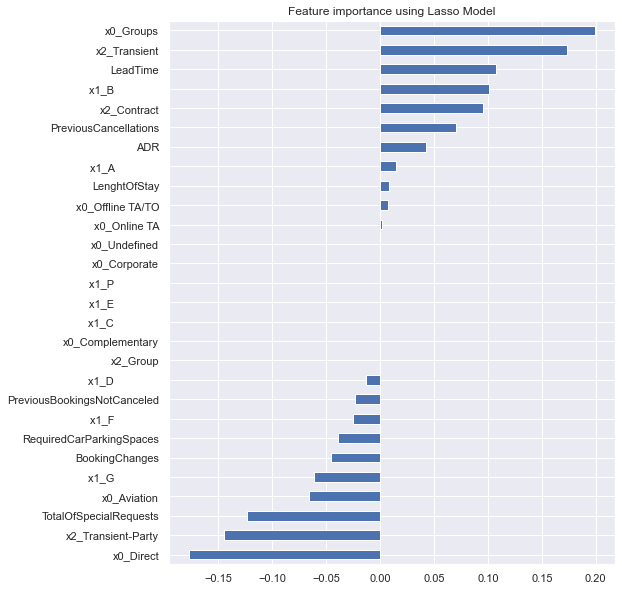

In [37]:
plot_importance(coef,'Lasso')

## 5.3 Ridge

In [38]:
ridge = RidgeCV()

In [39]:
ridge.fit(X = data,y = target)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [40]:
print("Best alpha using built-in LassoCV: %f" % ridge.alpha_)

Best alpha using built-in LassoCV: 0.100000


In [41]:
print("Best score using built-in LassoCV: %f" %ridge.score(data,target))

Best score using built-in LassoCV: 0.291608


In [42]:
coef_ridge = pd.Series(ridge.coef_, index = data.columns)

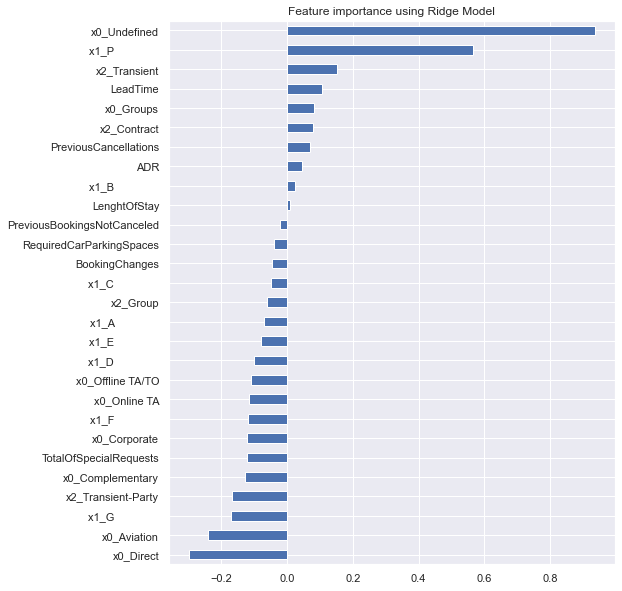

In [43]:
plot_importance(coef_ridge,'Ridge')

## 5.4 Features Selected for training

In [44]:
tokeep = ['x0_Online TA','x0_Groups', 'x2_Transient','LeadTime','ADR','PreviousBookingsNotCanceled','LenghtOfStay','BookingChanges','PreviousCancellations','TotalOfSpecialRequests','RequiredCarParkingSpaces']

In [45]:
data[tokeep]

,x0_Online TA,x0_Groups,x2_Transient,LeadTime,ADR,PreviousBookingsNotCanceled,LenghtOfStay,BookingChanges,PreviousCancellations,TotalOfSpecialRequests,RequiredCarParkingSpaces
0,0.0,0.0,1.0,-0.959756,-2.430810,-0.099645,-0.591686,-0.345685,-0.202233,-0.702332,-0.155706
1,1.0,0.0,1.0,-0.176681,-0.674930,-0.099645,0.702326,-0.345685,-0.202233,0.579878,-0.155706
2,1.0,0.0,1.0,-0.396324,-0.870027,-0.099645,0.702326,-0.345685,-0.202233,0.579878,-0.155706
3,1.0,0.0,1.0,-0.138482,-0.674930,-0.099645,1.996338,-0.345685,-0.202233,1.862088,-0.155706
4,1.0,0.0,1.0,-0.062085,-0.674930,-0.099645,-0.591686,-0.345685,-0.202233,0.579878,-0.155706
...,...,...,...,...,...,...,...,...,...,...,...
77187,0.0,0.0,1.0,-0.797411,-0.224139,-0.099645,2.643344,-0.345685,-0.202233,-0.702332,-0.155706
77188,1.0,0.0,1.0,-0.042985,2.743414,-0.099645,2.643344,-0.345685,-0.202233,1.862088,-0.155706
77189,1.0,0.0,1.0,-0.692365,1.189058,-0.099645,2.643344,-0.345685,-0.202233,4.426508,-0.155706
77190,1.0,0.0,1.0,0.023863,-0.034550,-0.099645,2.643344,-0.345685,-0.202233,-0.702332,-0.155706


# 6. Train/Test Split

In [46]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data[tokeep], 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=40, 
                                                    shuffle=True, 
                                                    stratify=target
                                                   )

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size = 0.25,
                                                  random_state = 40,
                                                  shuffle=True,
                                                  stratify=y_train_val
)

In [48]:
print('train:{}% | validation:{}% | test:{}%'.format(round(len(y_train)/len(target),2),
                                                     round(len(y_val)/len(target),2),
                                                     round(len(y_test)/len(target),2)
                                                    ))

train:0.6% | validation:0.2% | test:0.2%


# Random Forest Classifier

In [49]:
rf = RandomForestClassifier(min_samples_split=7 , n_estimators= 800,random_state=42)

In [50]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=800, random_state=42)

In [51]:
z_pred_rf= rf.predict(X_test)

In [52]:
rf_score = rf.score(X_test, y_test)
cnf_matrix = confusion_matrix(y_test, z_pred_rf)
rf_score

0.8425416153895978

In [53]:
print(classification_report(y_test, z_pred_rf))
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      9028
           1       0.85      0.75      0.80      6411

    accuracy                           0.84     15439
   macro avg       0.84      0.83      0.83     15439
weighted avg       0.84      0.84      0.84     15439

[[8172  856]
 [1575 4836]]


### Feature's importance for model

In [54]:
rf.feature_importances_

array([0.02185413, 0.04557631, 0.06578386, 0.31682479, 0.23767988,
       0.0045824 , 0.05733069, 0.03840901, 0.07984612, 0.11999137,
       0.01212145])

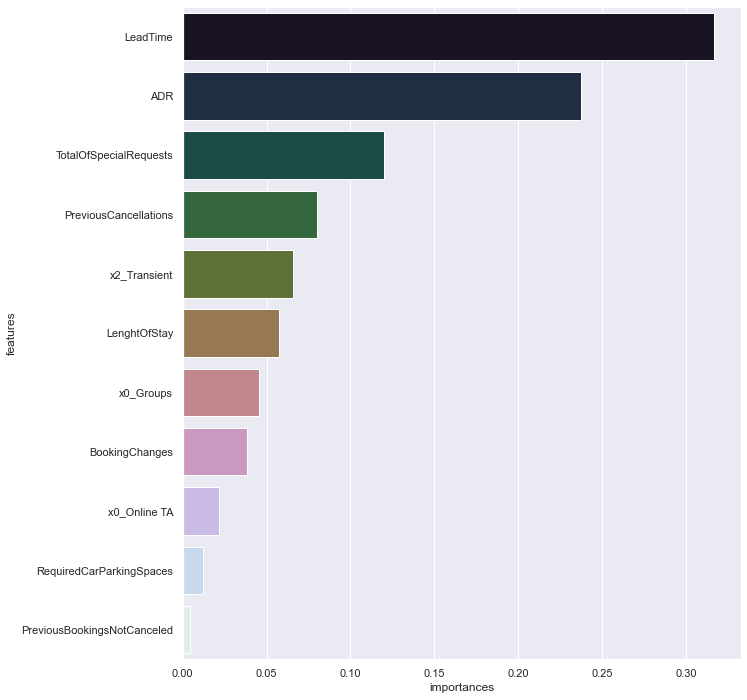

In [55]:
fig = plt.figure(figsize = (10,12))
importances = rf.feature_importances_
features = X_train.columns
data_tuples = list(zip(importances, features))
data_imp = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_imp = data_imp.sort_values('importances', ascending = False)
sns.barplot(data_imp['importances'], data_imp['features'], palette = 'cubehelix', orient = 'h')

# Repeated K FOLD

In [56]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [57]:
scores = cross_val_score(rf, X[tokeep], y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.848 (0.005)


## GridSearchCV

In [58]:
#parameters = {
#    "n_estimators":[800],
#    "random_state":[20,30,40],
#    "min_samples_split":[7,8]   
#}

In [59]:
#cv = GridSearchCV(rf,parameters,cv=3,n_jobs=-1)
#cv.fit(data,target.values.ravel())

In [60]:
#def display(results):
#    print(f'Best parameters are: {results.best_params_}')
#    print("\n")
#    mean_score = results.cv_results_['mean_test_score']
#    std_score = results.cv_results_['std_test_score']
#    params = results.cv_results_['params']
#    for mean,std,params in zip(mean_score,std_score,params):
#        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [61]:
#display(cv)

# Analysis of Canceled Reservations

In [62]:
new_df= df[df['IsCanceled'] == 1]
new_df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,LenghtOfStay,ArrivalDate
1,1,-0.176681,2015,July,27,1,-0.934983,1.488463,0.283748,-0.246454,...,NULL,-0.176231,Transient,-0.674930,-0.155706,0.579878,Canceled,2015-07-01,0.702326,2015-07-01
2,1,-0.396324,2015,July,27,1,-0.934983,1.488463,-1.690927,-0.246454,...,NULL,-0.176231,Transient,-0.870027,-0.155706,0.579878,Canceled,2015-04-30,0.702326,2015-07-01
3,1,-0.138482,2015,July,27,1,1.461087,1.488463,0.283748,-0.246454,...,NULL,-0.176231,Transient,-0.674930,-0.155706,1.862088,Canceled,2015-06-23,1.996338,2015-07-01
4,1,-0.062085,2015,July,27,2,-0.934983,-0.106947,0.283748,-0.246454,...,NULL,-0.176231,Transient,-0.674930,-0.155706,0.579878,Canceled,2015-04-02,-0.591686,2015-07-02
5,1,-0.262628,2015,July,27,2,-0.934983,0.690758,0.283748,-0.246454,...,NULL,-0.176231,Transient,-0.674930,-0.155706,0.579878,Canceled,2015-06-25,0.055320,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70220,1,0.243506,2017,April,17,25,-0.934983,-1.702357,-3.665603,-0.246454,...,NULL,-0.176231,Transient,-2.430810,-0.155706,3.144298,Canceled,2017-04-25,-1.885699,2017-04-25
71295,1,-0.978855,2017,June,23,5,0.263052,-1.702357,-1.690927,-0.246454,...,238,-0.176231,Transient,-0.938885,-0.155706,-0.702332,Canceled,2017-06-05,-1.238693,2017-06-05
71864,1,-0.950206,2017,May,22,31,-0.934983,-0.904652,-1.690927,-0.246454,...,238,-0.176231,Transient,-0.938885,-0.155706,-0.702332,Canceled,2017-05-31,-1.238693,2017-05-31
71865,1,-0.959756,2017,July,29,17,0.263052,-1.702357,-1.690927,-0.246454,...,238,-0.176231,Transient,-0.938885,-0.155706,-0.702332,No-Show,2017-07-17,-1.238693,2017-07-17


In [63]:
new_df['FreeRoom'] = new_df['ReservationStatus']
new_df['FreeRoom'].replace('No-Show', 1, inplace=True)
new_df['FreeRoom'].replace('Check-Out', 1, inplace=True)
new_df['FreeRoom'].replace('Canceled', 0, inplace=True)

In [64]:
#Now for CancelLeadTime
new_df['ReservationStatusDate'] = pd.to_datetime(new_df['ReservationStatusDate'])
new_df['CancelLeadTime'] = new_df['ArrivalDate'] - new_df['ReservationStatusDate']
new_df['CancelLeadTimeDays'] = new_df['CancelLeadTime'].dt.components.days
new_df.drop(['CancelLeadTime'],axis=1,inplace=True)

In [65]:
new_df['TotalCostOfStay'] = new_df['ADR']*new_df['LenghtOfStay']

In [66]:
new_df['TotalCostOfStay'].sum()

3883.9543720099537

# Net Demand by Week Analysis

## 2015

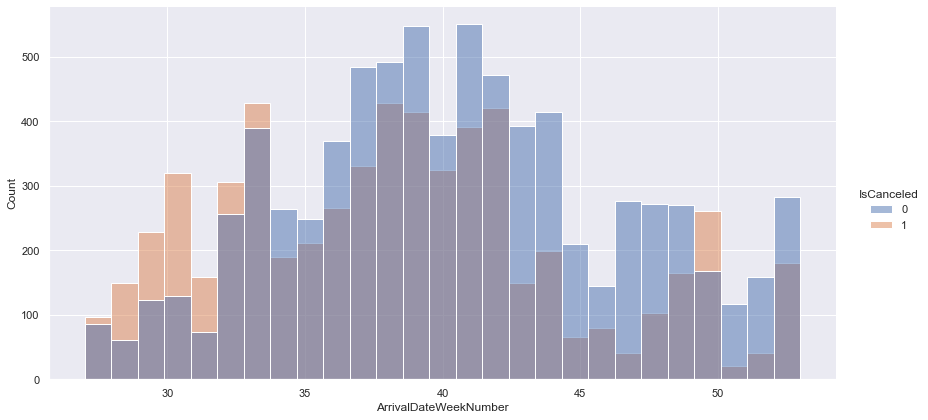

In [67]:
df2015= df[df['ArrivalDateYear'] == "2015"]
sns.displot(df2015, height=6, aspect=2, color='t' , x="ArrivalDateWeekNumber",bins=27, hue='IsCanceled')

## 2016

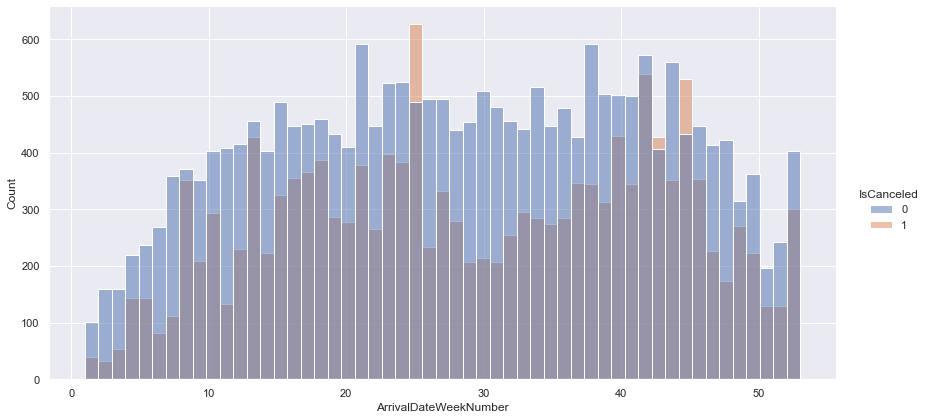

In [68]:
df2016= df[df['ArrivalDateYear'] == "2016"]
sns.displot(df2016, height=6, aspect=2, color='t' , x="ArrivalDateWeekNumber",bins=53, hue='IsCanceled')

## 2017

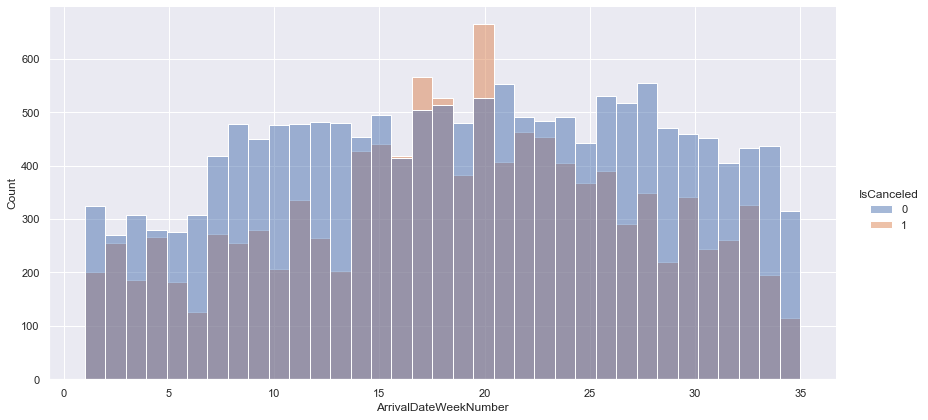

In [69]:
df2017= df[df['ArrivalDateYear'] == "2017"]
sns.displot(df2017, height=6, aspect=2, color='t' , x="ArrivalDateWeekNumber",bins=35, hue='IsCanceled')

## Full Period Analysis

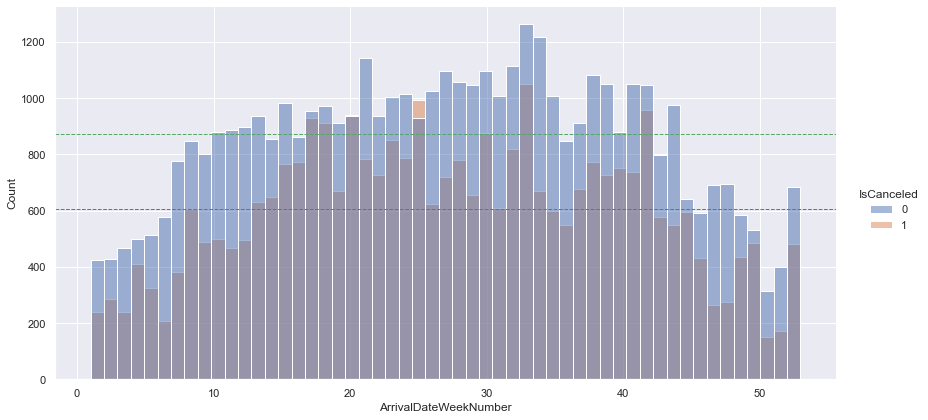

In [70]:
AverageBookingsPerWeekCancelled= 605
AverageBookingsPerWeekNotCancelled= 872
sns.displot(df, height=6, aspect=2, color='t' , x="ArrivalDateWeekNumber",bins=53, hue='IsCanceled')
plt.axhline(AverageBookingsPerWeekNotCancelled, color='g', linestyle='dashed', linewidth=1)
plt.axhline(AverageBookingsPerWeekCancelled, color='r', linestyle='dashed', linewidth=1)